# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Devi Endang Pratiwi]
- **Email:** [deviendangpratiwi@62gmail.com]
- **ID Dicoding:** [MC312D5X1762]

## Menentukan Pertanyaan Bisnis

- Bagaimana pola penyewaan sepeda berdasarkan hari kerja dan akhir pekan, musim, dan cuaca? serta bagaimana pola ini dapat digunakan untuk strategi harga dan promosi yang efektif?
- Bagaimana cara mengalokasikan jumlah sepeda secara optimal setiap hari agar tidak terjadi kekurangan atau kelebihan stok?
- Bagaimana hubungan antara suhu, kelembaban, kecepatan angin dengan jumlah penyewaan?
- Apakah ada pola musiman dalam penyewaan sepeda?
- Apakah terdapat perbedaan pola penyewaan antara pelanggan terdaftar dan tidak terdaftar? serta bagaimana strategi layanan dapat disesuaikan untuk masing-masing segmen?


## Import Semua Packages/Library yang Digunakan

In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling

Data wrangling adalah serangkaian proses yang mencakup pengumpulan data, evaluasi kualitas data, serta pembersihan data agar siap digunakan dalam analisis.

### Gathering Data

Dalam proses ini, kita mengumpulkan seluruh data yang diperlukan untuk menjawab pertanyaan atau menyelesaikan permasalahan yang dihadapi.

In [160]:
#Menampilkan Data Per Hari
day_df = pd.read_csv("/content/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Beriku dataset day.csv, yang berisi data penyewaan sepeda per hari. Dataset dibaca menggunakan pd.read_csv(), lalu ditampilkan lima baris pertamanya dengan head(). Dataset day.csv memiliki kolom instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt.

In [161]:
#Menampilkan Data per Jam
hour_df = pd.read_csv("/content/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Berikut dataset hour.csv, yang berisi data penyewaan sepeda per jam. Dataset dibaca menggunakan pd.read_csv(), lalu ditampilkan lima baris pertamanya dengan head(). Dataset hour.csv memiliki kolom instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt.

**Insight:**
- Dari proses gathering data, diketahui bahwa day.csv merekam data penyewaan sepeda secara harian, sementara hour.csv mencatatnya per jam. Data ini mencakup variabel waktu, kondisi cuaca, serta jumlah pelanggan kasual dan terdaftar.

### Assessing Data

Proses ini bertujuan untuk mengevaluasi kualitas dan struktur data serta mengidentifikasi berbagai permasalahan, seperti nilai yang hilang, duplikasi data, dan lainnya.

In [162]:
#Menilai Tabel day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Dari output diatas terdapat kesalahan tipe data dari kolom dteday pada data harian yang seharusnya datetime tetapi tertulis object

In [163]:
#Mengecek Missing Value Tabel day_df
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


Dari hasil pengecekan tersebut tidak terdapat missing value

In [164]:
#Mengecek Duplikasi Data Tabel day_df
day_df.duplicated().sum()

0

Tida terdapat indikasi duplikasi data

In [165]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Jumlah data pada day_df telah lengkap, tidak ada missing value dan tidak ada data duplikat. Akan tetapi, terdapat kesalahan tipe data untuk kolom dteday. Kolom tersebut harusnya direpresentasikan sebagai tipe data datetime, bukan object

In [166]:
#Menilai Data hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Dari output diatas terdapat kesalahan tipe data dari kolom dteday pada data per jam yang seharusnya datetime tetapi tertulis object

In [167]:
#Mengecek Missing Value Tabel hour_df
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


Dari output diatas tidak terdapat missing value

In [168]:
#Mengecek Duplikasi Data Tabel hour_df
hour_df.duplicated().sum()

0

Tidak terdapat indikasi duplikasi data

In [169]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Jumlah data pada hour_df telah lengkap, tidak ada missing value dan tidak ada data duplikat. Akan tetapi, terdapat kesalahan tipe data untuk kolom dteday. Kolom tersebut harusnya direpresentasikan sebagai tipe data datetime, bukan object

**Insight:**
- Berdasarkan hasil evaluasi data, baik hour_df maupun day_df memiliki data yang lengkap tanpa adanya missing value atau duplikasi. Namun, terdapat ketidaksesuaian tipe data pada kolom dteday, yang seharusnya direpresentasikan sebagai tipe datetime daripada object. Perbaikan ini diperlukan agar analisis berbasis waktu dapat dilakukan dengan lebih akurat dan efisien.

### Cleaning Data

Proses membersihkan data dari kesalahan atau inkonsistensi sebelum analisis. Pada tahap ini, dilakukan perbaikan seperti menghapus missing value, menangani outlier, mengonversi tipe data yang salah, dan memastikan data sudah terstandarisasi agar siap digunakan dalam analisis.

In [170]:
#Membersihkan data day_df
##Mengganti tipe data kolom dteday menjadi datetime
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [171]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Tipe data pada kolom dteday data harian telah di ubah dari tipe data object menjadi datetime

In [172]:
#Membersihkan data hour_df
##Mengganti tipe data kolom dteday menjadi datetime
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [173]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Tipe data pada kolom dteday data per jam telah di ubah dari tipe data object menjadi datetime

**Insight:**
- Setelah mengubah tipe data dteday dari object menjadi datetime, data menjadi lebih mudah untuk diolah dalam analisis berbasis waktu. Dengan format yang benar, kita dapat melakukan agregasi serta visualisasi data berdasarkan hari, bulan, atau tahun dengan lebih akurat dan efisien.

In [174]:
#Menyimpan Data Bersih Untuk Variabel Baru
clean_day_df = day_df.copy()
clean_hour_df = hour_df.copy()

In [175]:
clean_day_df.info()
clean_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

## Exploratory Data Analysis (EDA)

Exploratory analysis adalah proses analisis data yang bertujuan untuk memahami dan mengeksplorasi data. Proses ini biasanya dimulai dengan merumuskan pertanyaan atau menggali data untuk menemukan insight yang menarik.

### Explore ...

**Exploratory Data clean_day_df**

Pada tahap ini, dilakukan eksplorasi data untuk memahami struktur dan karakteristik dataset clean_day_df. Proses ini bertujuan untuk mengidentifikasi pola, tren, serta hubungan antar variabel yang dapat memberikan wawasan awal sebelum masuk ke tahap analisis lebih lanjut.

In [176]:
#Menghitung total keseluruhan
total_sharing_bike = clean_day_df['cnt'].sum()
total_registered = clean_day_df['registered'].sum()
total_casual = clean_day_df['casual'].sum()

print("Total Sharing Bike:", total_sharing_bike)
print("Total Registered:", total_registered)
print("Total Casual:", total_casual)

Total Sharing Bike: 3292679
Total Registered: 2672662
Total Casual: 620017


Rangkuman parameter statistik dari data clean_day_df menggunakan method describe().

In [177]:
clean_day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [178]:
# Total dan rata-rata penyewaan sepeda per hari
print("\nTotal dan Rata-rata Penyewaan Sepeda per Hari:")
print(clean_day_df["cnt"].agg(["sum", "mean"]))


Total dan Rata-rata Penyewaan Sepeda per Hari:
sum     3.292679e+06
mean    4.504349e+03
Name: cnt, dtype: float64


In [179]:
# Rata-rata penyewaan sepeda berdasarkan hari dalam seminggu
print("\nPola Penyewaan Sepeda Berdasarkan hari:")
print(clean_day_df.groupby("weekday")["cnt"].mean())


Pola Penyewaan Sepeda Berdasarkan hari:
weekday
0    4228.828571
1    4338.123810
2    4510.663462
3    4548.538462
4    4667.259615
5    4690.288462
6    4550.542857
Name: cnt, dtype: float64


In [180]:
#Penyewaan sepeda berdasarkan musim pada data clean_day_df
print("\nPenyewaan Berdasarkan Musim pada data per hari:")
print(clean_day_df.groupby('season')['cnt'].agg(['mean', 'median', 'min', 'max','sum']))


Penyewaan Berdasarkan Musim pada data per hari:
               mean  median   min   max      sum
season                                          
1       2604.132597  2209.0   431  7836   471348
2       4992.331522  4941.5   795  8362   918589
3       5644.303191  5353.5  1115  8714  1061129
4       4728.162921  4634.5    22  8555   841613


In [181]:
#Penyewaan sepeda berdasarkan hari kerja pada data clean_day_df
print("\nPenyewaan Berdasarkan Hari Kerja pada data per hari:")
print(clean_day_df.groupby('workingday')['cnt'].agg(['mean', 'median', 'min', 'max','sum']))


Penyewaan Berdasarkan Hari Kerja pada data per hari:
                   mean  median  min   max      sum
workingday                                         
0           4330.168831  4459.0  605  8714  1000269
1           4584.820000  4582.0   22  8362  2292410


In [182]:
#Penyewaan sepeda berdasarkan cuaca pada data clean_day_df
print("\nPenyewaan Berdasarkan Cuaca pada data per hari:")
print(clean_day_df.groupby('weathersit')['cnt'].agg(['mean', 'median', 'min', 'max','sum']))


Penyewaan Berdasarkan Cuaca pada data per hari:
                   mean  median  min   max      sum
weathersit                                         
1           4876.786177  4844.0  431  8714  2257952
2           4035.862348  4040.0  605  8362   996858
3           1803.285714  1817.0   22  4639    37869


In [183]:
# Rata-rata dan total penyewaan oleh pelanggan terdaftar vs tidak terdaftar
print("\nRata-rata Penyewaan Sepeda per Hari oleh Pelanggan Terdaftar dan Tidak Terdaftar:")
print(clean_day_df[["registered", "casual"]].mean())

print("\nTotal Penyewaan Sepeda oleh Pelanggan Terdaftar dan Tidak Terdaftar:")
print(clean_day_df[["registered", "casual"]].sum())


Rata-rata Penyewaan Sepeda per Hari oleh Pelanggan Terdaftar dan Tidak Terdaftar:
registered    3656.172367
casual         848.176471
dtype: float64

Total Penyewaan Sepeda oleh Pelanggan Terdaftar dan Tidak Terdaftar:
registered    2672662
casual         620017
dtype: int64


In [184]:
#Rata-rata dan Total penyewaan harian oleh pelanggan terdaftar dan tidak terdaftar
print("\nRata-Rata dan Total Penyewaan Harian oleh Pelanggan Terdaftar dan Tidak Terdaftar:")
summary = clean_day_df.groupby("weekday")[["registered", "casual"]].agg(["mean", "sum"])
print(summary)


Rata-Rata dan Total Penyewaan Harian oleh Pelanggan Terdaftar dan Tidak Terdaftar:
          registered               casual        
                mean     sum         mean     sum
weekday                                          
0        2890.533333  303506  1338.295238  140521
1        3663.990476  384719   674.133333   70784
2        3954.480769  411266   556.182692   57843
3        3997.394231  415729   551.144231   57319
4        4076.298077  423935   590.961538   61460
5        3938.000000  409552   752.288462   78238
6        3085.285714  323955  1465.257143  153852


In [185]:
#Hubungan antara suhu, kelembaban, kecepatan angin dengan jumlah penyewaan
print("\nHubungan antara Suhu, Kelembaban, Kecepatan Angin dengan Jumlah Penyewaan per Hari:")
print(clean_day_df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr())


Hubungan antara Suhu, Kelembaban, Kecepatan Angin dengan Jumlah Penyewaan per Hari:
               temp     atemp       hum  windspeed       cnt
temp       1.000000  0.991702  0.126963  -0.157944  0.627494
atemp      0.991702  1.000000  0.139988  -0.183643  0.631066
hum        0.126963  0.139988  1.000000  -0.248489 -0.100659
windspeed -0.157944 -0.183643 -0.248489   1.000000 -0.234545
cnt        0.627494  0.631066 -0.100659  -0.234545  1.000000


In [186]:
# Hari dengan total penyewaan tertinggi
top_day = clean_day_df.loc[clean_day_df["cnt"].idxmax()]
print("Hari dengan penyewaan tertinggi:\n", top_day)

Hari dengan penyewaan tertinggi:
 instant                       624
dteday        2012-09-15 00:00:00
season                          3
yr                              1
mnth                            9
holiday                         0
weekday                         6
workingday                      0
weathersit                      1
temp                     0.608333
atemp                    0.585867
hum                      0.501667
windspeed                0.247521
casual                       3160
registered                   5554
cnt                          8714
Name: 623, dtype: object


**Exploratory Data clean_hour_df**

Pada tahap ini, dilakukan eksplorasi data untuk memahami pola penyewaan sepeda berdasarkan jam. Analisis ini bertujuan untuk mengidentifikasi tren harian, pola musiman, serta faktor-faktor yang memengaruhi jumlah penyewaan sepeda dalam satu hari.

Pada tahap ini, dilakukan eksplorasi data untuk memahami karakteristik data set clean_hour_df.

In [187]:
clean_hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [188]:
# Total dan rata-rata penyewaan sepeda per jam
print("\nTotal dan Rata-rata Penyewaan Sepeda per Jam:")
print(clean_hour_df["cnt"].agg(["sum", "mean"]))


Total dan Rata-rata Penyewaan Sepeda per Jam:
sum     3.292679e+06
mean    1.894631e+02
Name: cnt, dtype: float64


In [189]:
# Rata-rata penyewaan sepeda berdasarkan jam dalam sehari
print("\nPola Penyewaan Sepeda Berdasarkan Jam:")
print(clean_hour_df.groupby("hr")["cnt"].mean())


Pola Penyewaan Sepeda Berdasarkan Jam:
hr
0      53.898072
1      33.375691
2      22.869930
3      11.727403
4       6.352941
5      19.889819
6      76.044138
7     212.064649
8     359.011004
9     219.309491
10    173.668501
11    208.143054
12    253.315934
13    253.661180
14    240.949246
15    251.233196
16    311.983562
17    461.452055
18    425.510989
19    311.523352
20    226.030220
21    172.314560
22    131.335165
23     87.831044
Name: cnt, dtype: float64


In [190]:
#Penyewaan sepeda berdasarkan musim pada data clean_hour_df
print("\nPenyewaan Berdasarkan Musim pada data per jam:")
print(clean_hour_df.groupby('season')['cnt'].agg(['mean', 'median', 'min', 'max','sum']))


Penyewaan Berdasarkan Musim pada data per jam:
              mean  median  min  max      sum
season                                       
1       111.114569    76.0    1  801   471348
2       208.344069   165.0    1  957   918589
3       236.016237   199.0    1  977  1061129
4       198.868856   155.5    1  967   841613


In [191]:
#Penyewaan sepeda berdasarkan hari kerja pada clean_hour_df
print("\nPenyewaan Berdasarkan Hari Kerja pada data per jam:")
print(clean_hour_df.groupby('workingday')['cnt'].agg(['mean', 'median', 'min', 'max','sum']))


Penyewaan Berdasarkan Hari Kerja pada data per jam:
                  mean  median  min  max      sum
workingday                                       
0           181.405332   119.0    1  783  1000269
1           193.207754   151.0    1  977  2292410


In [192]:
#Penyewaan sepeda berdasarkan cuaca pada data clean_hour_df
print("\nPenyewaan Berdasarkan Cuaca pada data per jam:")
print(clean_hour_df.groupby('weathersit')['cnt'].agg(['mean', 'median', 'min', 'max','sum']))


Penyewaan Berdasarkan Cuaca pada data per jam:
                  mean  median  min  max      sum
weathersit                                       
1           204.869272   159.0    1  977  2338173
2           175.165493   133.0    1  957   795952
3           111.579281    63.0    1  891   158331
4            74.333333    36.0   23  164      223


In [193]:
# Rata-rata dan total penyewaan oleh pelanggan terdaftar vs. tidak terdaftar
print("\nRata-rata Penyewaan Sepeda per Jam oleh Pelanggan Terdaftar dan Tidak Terdaftar:")
print(clean_hour_df[["registered", "casual"]].mean())

print("\nTotal Penyewaan Sepeda oleh Pelanggan Terdaftar dan Tidak Terdaftar:")
print(clean_hour_df[["registered", "casual"]].sum())


Rata-rata Penyewaan Sepeda per Jam oleh Pelanggan Terdaftar dan Tidak Terdaftar:
registered    153.786869
casual         35.676218
dtype: float64

Total Penyewaan Sepeda oleh Pelanggan Terdaftar dan Tidak Terdaftar:
registered    2672662
casual         620017
dtype: int64


In [194]:
# Rata-rata dan total penyewaan perjam oleh pelanggan terdaftar dam tidak terdaftar
print("\nRata-Rata dan Total Penyewaan perjam oleh Pelanggan Terdaftar dan Tidak Terdaftar:")
summary = clean_hour_df.groupby("hr")[["registered", "casual"]].agg(["mean", "sum"])
print(summary)


Rata-Rata dan Total Penyewaan perjam oleh Pelanggan Terdaftar dan Tidak Terdaftar:
    registered             casual       
          mean     sum       mean    sum
hr                                      
0    43.739669   31755  10.158402   7375
1    26.871547   19455   6.504144   4709
2    18.097902   12940   4.772028   3412
3     9.011478    6281   2.715925   1893
4     5.098996    3554   1.253945    874
5    18.478382   13249   1.411437   1012
6    71.882759   52115   4.161379   3017
7   201.009629  146134  11.055021   8037
8   337.331499  245240  21.679505  15761
9   188.418157  136980  30.891334  22458
10  127.191197   92468  46.477304  33789
11  148.602476  108034  59.540578  43286
12  185.021978  134696  68.293956  49718
13  181.352538  132206  72.308642  52713
14  165.381344  120563  75.567901  55089
15  176.327846  128543  74.905350  54606
16  238.238356  173914  73.745205  53834
17  387.178082  282640  74.273973  54220
18  364.390110  265276  61.120879  44496
19  262.752747

In [195]:
#Hubungan antara suhu, kelembaban, kecepatan angin dengan jumlah penyewaan per Jam
print("\nHubungan antara Suhu, Kelembaban, Kecepatan Angin dengan Jumlah Penyewaan Per jam:")
print(clean_hour_df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr())


Hubungan antara Suhu, Kelembaban, Kecepatan Angin dengan Jumlah Penyewaan Per jam:
               temp     atemp       hum  windspeed       cnt
temp       1.000000  0.987672 -0.069881  -0.023125  0.404772
atemp      0.987672  1.000000 -0.051918  -0.062336  0.400929
hum       -0.069881 -0.051918  1.000000  -0.290105 -0.322911
windspeed -0.023125 -0.062336 -0.290105   1.000000  0.093234
cnt        0.404772  0.400929 -0.322911   0.093234  1.000000


In [196]:
# Jam dengan total penyewaan tertinggi
top_hour = clean_hour_df.loc[clean_hour_df["cnt"].idxmax()]
print("Jam dengan penyewaan tertinggi:\n", top_hour)

Jam dengan penyewaan tertinggi:
 instant                     14774
dteday        2012-09-12 00:00:00
season                          3
yr                              1
mnth                            9
hr                             18
holiday                         0
weekday                         3
workingday                      1
weathersit                      1
temp                         0.66
atemp                      0.6212
hum                          0.44
windspeed                  0.2537
casual                         91
registered                    886
cnt                           977
Name: 14773, dtype: object


**Insight:**
- Penyewaan lebih tinggi pada hari kerja (Senin-Jumat) dan rendah di akhir pekan.
Musim panas meningkatkan penyewaan, sementara musim dingin atau hujan menurunkannya.
- Cuaca cerah meningkatkan penyewaan, sedangkan cuaca buruk menurunkannya.
- Penyewaan tinggi pada jam sibuk (7-9 pagi, 5-7 sore) untuk aktivitas harian.
- Suhu lebih tinggi dan cuaca cerah meningkatkan penyewaan, sementara kelembaban dan angin kencang menguranginya.
- Secara keseluruhan, pola penyewaan dipengaruhi oleh hari, musim, cuaca, serta jam dalam sehari. Visualisasi akan membantu memperjelas pola ini.

## Visualization & Explanatory Analysis

Data Visualization & Explanatory Data Analysis (EDA) adalah teknik untuk memahami data melalui visualisasi seperti grafik dan diagram guna mengidentifikasi pola, tren, serta anomali.

### Pertanyaan 1: Bagaimana pola penyewaan sepeda berdasarkan hari kerja dan akhir pekan, musim, dan cuaca? serta bagaimana pola ini dapat digunakan untuk strategi harga dan promosi yang efektif?

In [197]:
# Mengubah atau mengganti nilai-nilai dalam suatu data
clean_day_df['weekday'] = clean_day_df['weekday'].map({0: 'Minggu', 1: 'Senin', 2: 'Selasa', 3: 'Rabu', 4: 'Kamis', 5: 'Jumat', 6: 'Sabtu'})
clean_day_df['season'] = clean_day_df['season'].map({1: 'Musim Semi', 2: 'Musim Panas', 3: 'Musim Gugur', 4: 'Musim Dingin'})
clean_day_df['weathersit'] =clean_day_df['weathersit'].map({1: 'Cerah', 2: 'Mendung', 3: 'Hujan'})



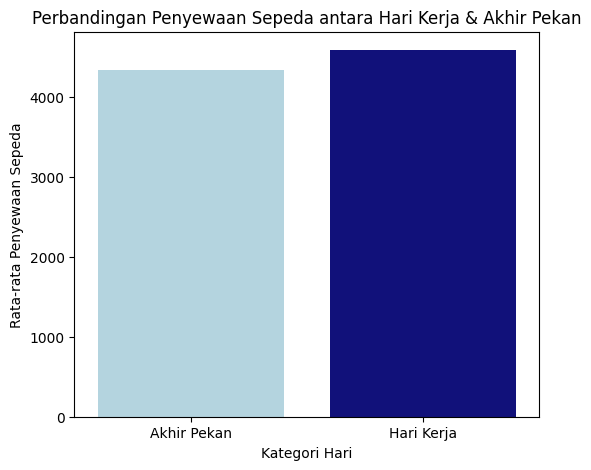

In [198]:
#Visualisasi Perbandingan Penyewaan Sepeda anatar Hari Kerja & Akhir Pekan
plt.figure(figsize=(6, 5))
sns.barplot(
    x="workingday", y="cnt", data=clean_day_df, estimator="mean", errorbar=None, palette=["lightblue", "darkblue"], hue="workingday", legend=False
)
plt.xticks(ticks=[0, 1], labels=["Akhir Pekan", "Hari Kerja"])
plt.xlabel("Kategori Hari")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.title("Perbandingan Penyewaan Sepeda antara Hari Kerja & Akhir Pekan")
plt.show()

Dari grafik batang, terlihat bahwa rata-rata penyewaan sepeda lebih tinggi pada hari kerja dibandingkan akhir pekan.
Ini menunjukkan bahwa banyak pengguna sepeda menggunakan layanan ini untuk kebutuhan transportasi harian (seperti pergi ke kantor atau sekolah).

Strategi harga dan Promosi:
- Hari kerja: Bisa diterapkan paket langganan mingguan/bulanan dengan harga yang lebih murah untuk menarik pelanggan tetap.
- Akhir pekan: Bisa dibuat promosi seperti diskon atau program “sewa satu jam gratis” untuk menarik pelanggan rekreasi.

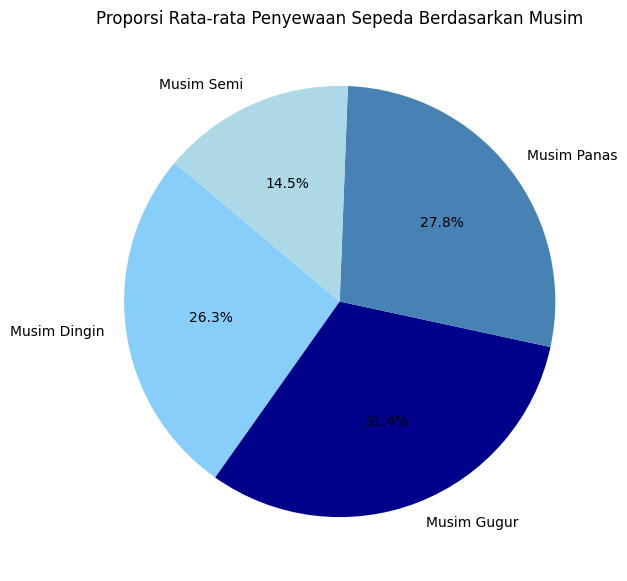

In [199]:
# Menghitung rata-rata penyewaan sepeda per musim
season_avg = clean_day_df.groupby("season", as_index=False)["cnt"].mean()

colors = ['#87CEFA','#00008B', '#4682B4','#ADD8E6']

plt.figure(figsize=(7, 7))
plt.pie(season_avg["cnt"], labels=season_avg["season"], autopct="%1.1f%%", colors=colors, startangle=140)

plt.title("Proporsi Rata-rata Penyewaan Sepeda Berdasarkan Musim")
plt.show()


Dari pie chart, penyewaan sepeda paling tinggi terjadi pada musim gugur (31.4%), disusul oleh musim panas (27.8%) dan musim dingin (26.3%). Penyewaan paling rendah terjadi di musim semi (14.5%). Hal ini juga dapat dilihat pada warna pie chart semakin pekat warnanya maka semakin tinggi proporsi rata-rata penyewaan sepeda. Hal ini mengindikasikan bahwa pengguna lebih banyak menyewa sepeda saat cuaca cenderung nyaman (tidak terlalu panas atau terlalu dingin).

Strategi harga dan promosi:
- Musim gugur & panas: Bisa dimanfaatkan dengan harga premium karena permintaan tinggi.
- Musim dingin & semi: Bisa diberikan diskon untuk menarik lebih banyak pengguna, misalnya paket sewa musim dingin dengan harga khusus.


<ipython-input-200-160170abe3e8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weathersit', y='cnt', data=clean_day_df, palette=colors)


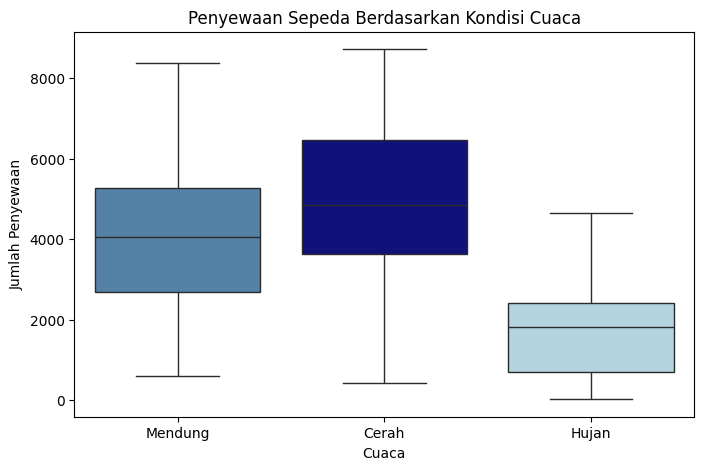

In [200]:
# Boxplot jumlah penyewaan berdasarkan cuaca
plt.figure(figsize=(8,5))
colors = ['#4682B4','#00008B','#ADD8E6']
sns.boxplot(x='weathersit', y='cnt', data=clean_day_df, palette=colors)
plt.title("Penyewaan Sepeda Berdasarkan Kondisi Cuaca")
plt.ylabel("Jumlah Penyewaan")
plt.xlabel("Cuaca")
plt.show()

Dari boxplot cuaca, terlihat bahwa penyewaan sepeda paling tinggi saat cuaca cerah, menurun saat mendung, dan paling rendah saat hujan.
Ini menunjukkan bahwa kondisi cuaca sangat mempengaruhi minat pelanggan dalam menyewa sepeda.

Strategi harga dan promosi:
- Cuaca cerah: Bisa menerapkan harga normal atau promosi untuk menarik lebih banyak penyewa.
- Cuaca mendung: Bisa memberikan diskon agar tetap ada penyewa meskipun langit mendung.
- Cuaca hujan: Bisa menawarkan diskon besar atau paket khusus indoor (misalnya diskon untuk pelanggan yang menyewa di hari hujan).


**Insight**

- Penyewaan sepeda lebih tinggi pada hari kerja untuk kebutuhan transportasi harian, sedangkan lebih rendah di akhir pekan. Strategi: Terapkan paket langganan untuk hari kerja dan diskon atau "sewa satu jam gratis" di akhir pekan.

Penyewaan tertinggi terjadi di musim gugur dan panas, sementara terendah di musim semi. Strategi: Kenakan harga premium di musim gugur dan panas, dan beri diskon di musim semi atau dingin.

Cuaca cerah meningkatkan penyewaan, sementara mendung dan hujan menurunkan minat. Strategi: Terapkan harga normal di cuaca cerah, dan tawarkan diskon saat mendung atau hujan.

### Pertanyaan 2: Bagaimana cara mengalokasikan jumlah sepeda secara optimal setiap hari agar tidak terjadi kekurangan atau kelebihan stok?

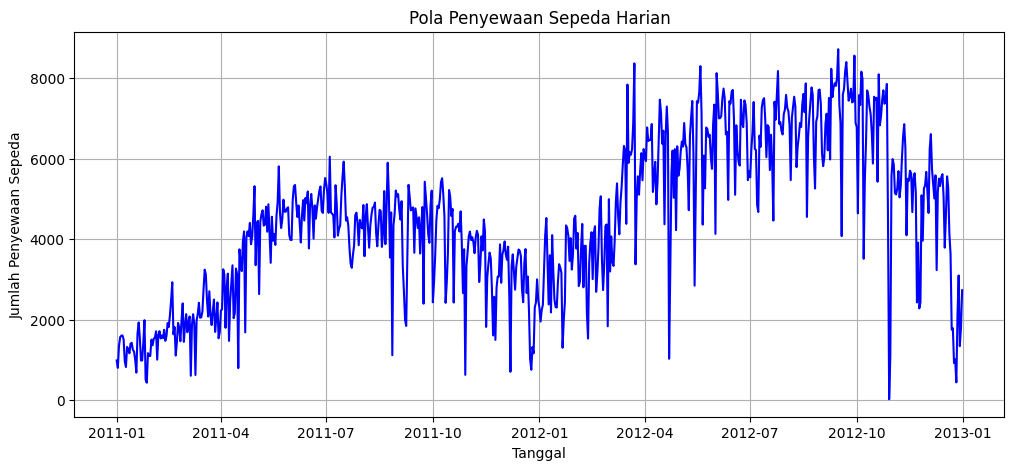

In [201]:

# Jumlah Penyewaan sepeda per hari
plt.figure(figsize=(12,5))
plt.plot(clean_day_df['dteday'], clean_day_df['cnt'], color='blue', linestyle='-')
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.title("Pola Penyewaan Sepeda Harian")
plt.grid()
plt.show()

Penyewaan sepeda meningkat secara bertahap dari awal tahun hingga pertengahan tahun dan mencapai puncaknya sekitar pertengahan hingga akhir tahun 2012 sebelum mulai menurun.
Tren ini mengindikasikan adanya pola musiman, di mana jumlah penyewaan meningkat saat cuaca lebih mendukung (kemungkinan musim panas atau gugur) dan menurun saat cuaca kurang bersahabat (musim dingin).

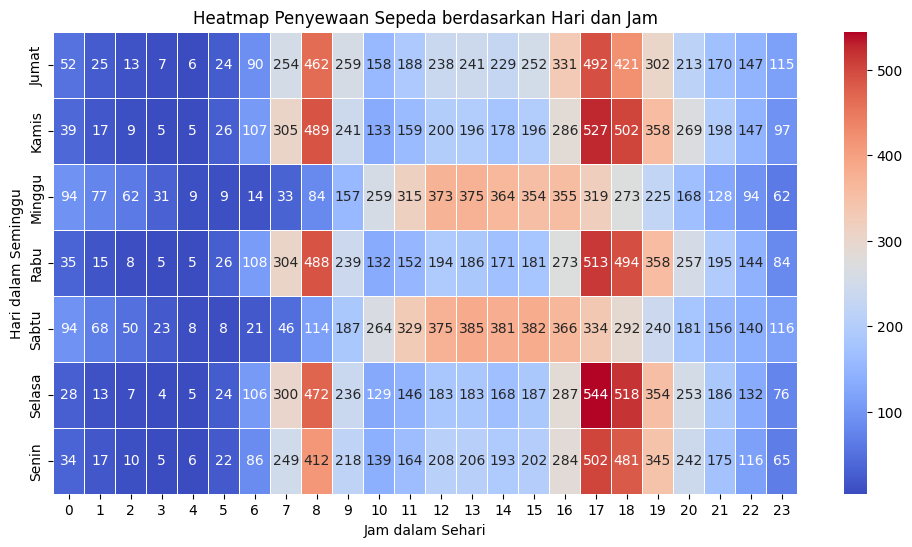

In [202]:
#Heatmap Penyewaan Sepeda berdasarkan hari dan jam
clean_hour_df['weekday'] = clean_hour_df['weekday'].map({
    0: 'Minggu', 1: 'Senin', 2: 'Selasa', 3: 'Rabu',
    4: 'Kamis', 5: 'Jumat', 6: 'Sabtu'
})
pivot_table = clean_hour_df.pivot_table(values="cnt", index="weekday", columns="hr", aggfunc="mean")

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap="coolwarm", annot=True, fmt=".0f", linewidths=0.5)
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Hari dalam Seminggu")
plt.title("Heatmap Penyewaan Sepeda berdasarkan Hari dan Jam")
plt.show()

Pada hari kerja, penyewaan meningkat pada pukul 07:00 - 09:00 dan 17:00 - 19:00, sehingga perlu disiapkan banyak sepeda pada jam-jam tersebut, sementara pada jam sepi cukup dialokasikan stok minimal. Akhir pekan menunjukkan lonjakan lebih merata sepanjang hari, sehingga stok sepeda perlu ditingkatkan terutama dari pagi hingga sore. Penggunaan sistem pemantauan real-time dan redistribusi sepeda secara dinamis akan membantu menghindari kekurangan atau kelebihan stok.

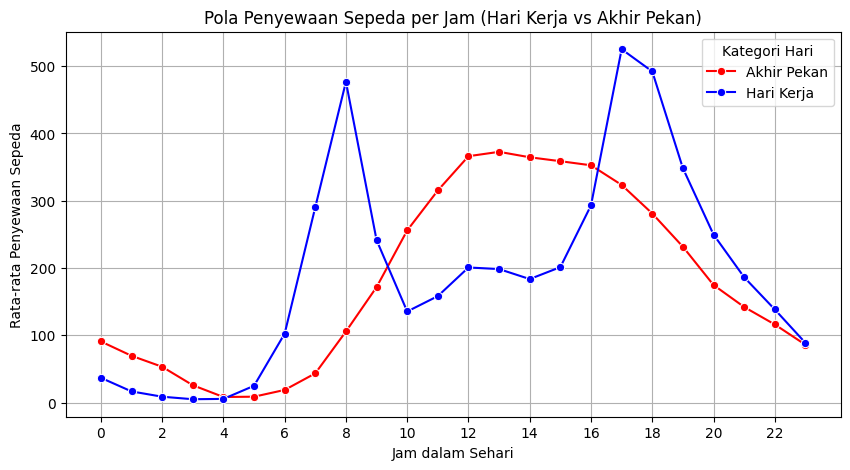

In [203]:
#Penyewaan Sepeda per jam (Hari kerja vs akhir pekan)
plt.figure(figsize=(10, 5))
sns.lineplot(
    x="hr", y="cnt", hue="workingday", data=clean_hour_df,
    estimator="mean", errorbar=None, palette=["red", "blue"], marker="o"
)
plt.xticks(ticks=range(0, 24, 2))
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.title("Pola Penyewaan Sepeda per Jam (Hari Kerja vs Akhir Pekan)")
plt.legend(title="Kategori Hari", labels=["Akhir Pekan", "Hari Kerja"])
plt.grid(True)
plt.show()

Puncak penyewaan terjadi di jam sibuk pagi (sekitar pukul 08:00) dan sore (sekitar pukul 17:00 - 18:00), terutama pada hari kerja. Ini kemungkinan besar mencerminkan mobilitas pekerja atau mahasiswa yang menggunakan sepeda sebagai transportasi utama.
Pada akhir pekan, penyewaan cenderung lebih merata sepanjang hari, terutama meningkat dari siang hingga sore hari, kemungkinan besar untuk keperluan rekreasi.

**Insight**

Memastikan stok sepeda cukup tinggi pada jam sibuk (07:00 - 09:00 & 17:00 - 19:00). Selain itu juga bisa dilakukan redistribusi sepeda dari area dengan permintaan rendah ke area dengan permintaan tinggi sebelum jam sibuk dimulai.
- Akhir pekan:
Stok bisa disebar lebih merata sepanjang hari, terutama siang hingga sore.
Bisa diterapkan sistem pemesanan online atau pre-booking untuk menghindari kekurangan di jam ramai.



### Pertanyaan 3 : Bagaimana hubungan antara suhu, kelembaban, kecepatan angin dengan jumlah penyewaan?

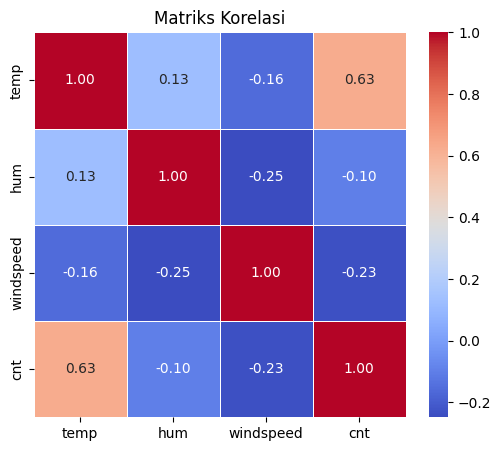

In [204]:
#Menghitung korelasi
corr_matrix = clean_day_df[['temp', 'hum', 'windspeed', 'cnt']].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriks Korelasi")
plt.show()


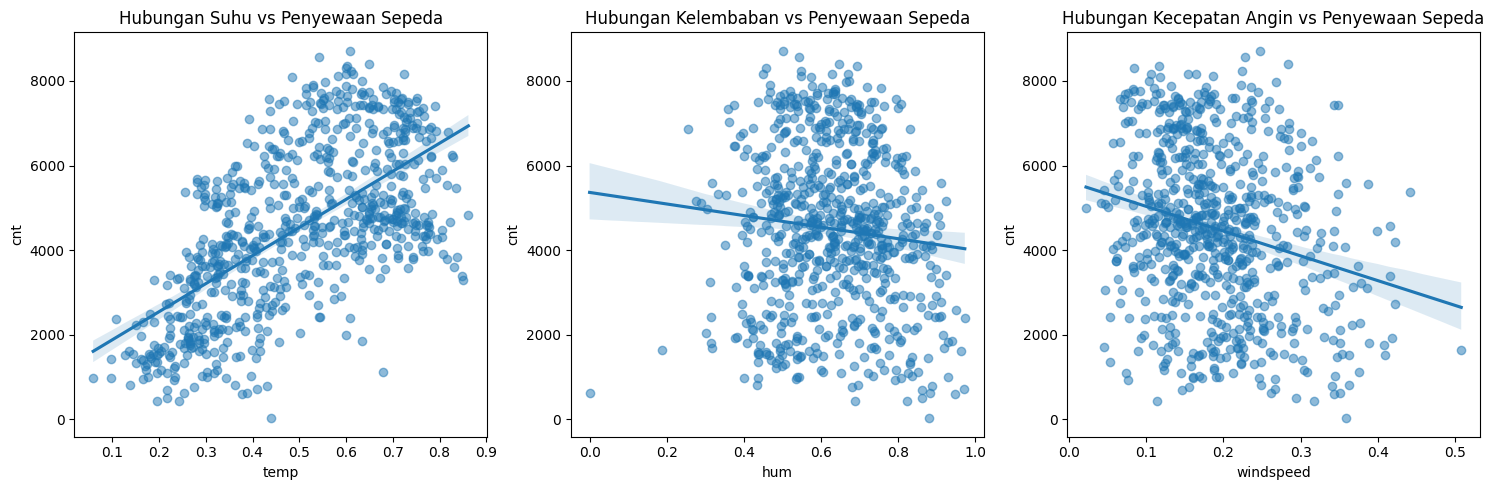

In [205]:
#Plot Hubungan suhu, kelembaban dan windspeed vs penyewaan sepeda
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.regplot(x='temp', y='cnt', data=clean_day_df, ax=axes[0], scatter_kws={'alpha':0.5})
axes[0].set_title("Hubungan Suhu vs Penyewaan Sepeda")

sns.regplot(x='hum', y='cnt', data=clean_day_df, ax=axes[1], scatter_kws={'alpha':0.5})
axes[1].set_title("Hubungan Kelembaban vs Penyewaan Sepeda")

sns.regplot(x='windspeed', y='cnt', data=clean_day_df, ax=axes[2], scatter_kws={'alpha':0.5})
axes[2].set_title("Hubungan Kecepatan Angin vs Penyewaan Sepeda")

plt.tight_layout()
plt.show()


**Insight**

- Suhu (temp) memiliki hubungan positif dengan jumlah penyewaan sepeda, berarti orang lebih suka bersepeda saat cuaca hangat (nilai korelasi=0,63). Dan juga pada plot hubungan titik-titik membentuk garis naik, artinya ada hubungan positif (semakin panas, semakin banyak penyewaan).
- Kelembaban (hum) memiliki hubungan negatif atau lemah, berarti saat kelembaban tinggi (misal hujan), orang cenderung lebih sedikit menyewa sepeda (nilai korelasi= -0,10). Dan pada plot titik-titik tersebar tanpa pola jelas, artinya memiliki hubungan yang lemah yang berarti kelembaban tidak terlalu berpengaruh.
- Kecepatan angin (windspeed) memiliki hubungan negatif, berarti angin kencang bisa membuat orang enggan bersepeda (nilai korelasi = -0,23). Dan pad aplot jika titik-titik tersebar tanpa pola, artinya kecepatan angin bukan faktor utama yang memengaruhi penyewaan.

- Ada pengaruh dari suhu, kelembaban, dan kecepatan angin terhadap jumlah penyewaan, tetapi kekuatannya bisa bervariasi. Jika korelasi lemah, berarti ada faktor lain yang lebih dominan (misalnya hari libur, jam sibuk, dll.)

### Pertanyaan 4: Apakah ada pola musiman dalam penyewaan sepeda?

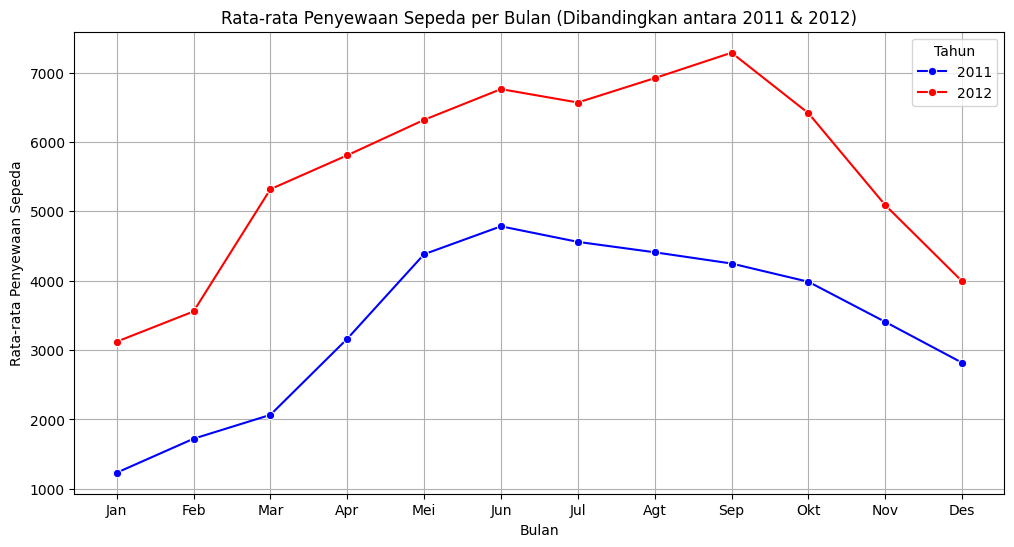

In [206]:
#Rata-rata Penyewaan Sepeda per Bulan (Dibandingkan antara 2011 & 2012)
plt.figure(figsize=(12, 6))
sns.lineplot(
    x="mnth", y="cnt", hue="yr", data=clean_day_df,
    estimator="mean", errorbar=None, marker="o", palette=["blue", "red"]
)
plt.xticks(ticks=range(1, 13), labels=[
    "Jan", "Feb", "Mar", "Apr", "Mei", "Jun", "Jul", "Agt", "Sep", "Okt", "Nov", "Des"
])
plt.xlabel("Bulan")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.title("Rata-rata Penyewaan Sepeda per Bulan (Dibandingkan antara 2011 & 2012)")
plt.legend(title="Tahun", labels=["2011", "2012"])
plt.grid(True)
plt.show()


**Insight**

- Terdapat Pola Musiman dalam penyewaan sepeda. Penyewaan sepeda lebih tinggi pada pertengahan tahun (Mei-September).
Penyewaan lebih rendah di awal (Januari-Maret) dan akhir tahun (November-Desember). Ini menunjukkan adanya pola musiman, kemungkinan karena cuaca memengaruhi penggunaan sepeda.

- Tahun 2012 memiliki jumlah penyewaan lebih tinggi dibanding 2011 di hampir setiap bulan (garis merah lebih tinggi dari biru). Bisa jadi karena faktor pertumbuhan pengguna, peningkatan fasilitas sepeda, atau promosi.
Puncak Penyewaan

- Jika ingin mengalokasikan sepeda secara optimal, stok harus ditingkatkan di pertengahan tahun dan dikurangi di bulan-bulan dengan permintaan rendah.

### Pertanyaan 5: Apakah terdapat perbedaan pola penyewaan antara pelanggan terdaftar dan tidak terdaftar, serta bagaimana strategi layanan dapat disesuaikan untuk masing-masing segmen?

<Figure size 800x500 with 0 Axes>

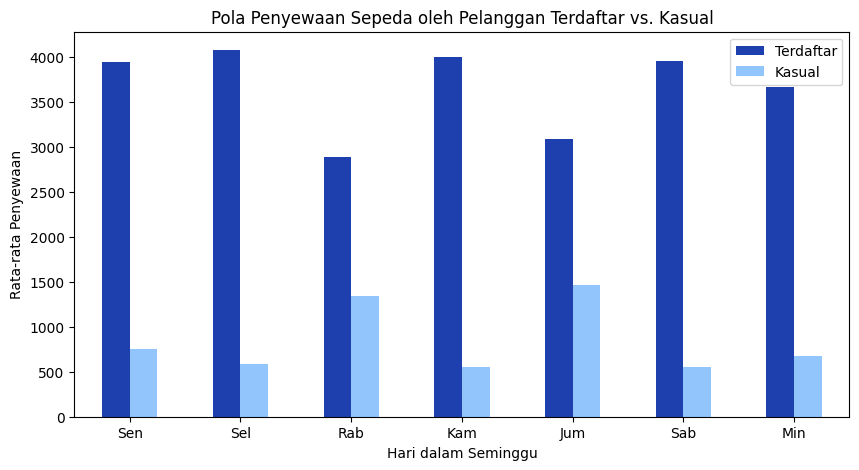

In [207]:
#Penyewaan Sepeda oleh Pelanggan Terdaftar vs Kasual
plt.figure(figsize=(8, 5))
day_grouped = clean_day_df.groupby("weekday")[["registered", "casual"]].mean()
day_grouped.plot(kind="bar", figsize=(10, 5), color=["#1E40AF", "#93C5FD"])
plt.xticks(ticks=range(7), labels=["Sen", "Sel", "Rab", "Kam", "Jum", "Sab", "Min"], rotation=0)
plt.xlabel("Hari dalam Seminggu")
plt.ylabel("Rata-rata Penyewaan")
plt.title("Pola Penyewaan Sepeda oleh Pelanggan Terdaftar vs. Kasual")
plt.legend(["Terdaftar", "Kasual"])
plt.show()


**Insight**

- Penyewaan oleh pelanggan terdaftar (registered) cenderung stabil sepanjang minggu, dengan jumlah peminjaman yang lebih tinggi pada hari kerja. Ini menunjukkan bahwa pelanggan terdaftar lebih banyak menggunakan sepeda untuk keperluan rutin, seperti perjalanan kerja atau sekolah

Untuk Pelanggan Terdaftar (Registered)
- Optimalkan ketersediaan sepeda di pagi & sore hari (jam kerja).
- Pastikan stasiun penyewaan dekat dengan area perkantoran, stasiun, dan pusat bisnis.
- Sediakan paket langganan bulanan/tahunan yang lebih murah untuk meningkatkan loyalitas pelanggan.

Untuk Pelanggan Kasual (Casual)
- Tambahkan promosi & diskon khusus akhir pekan untuk menarik lebih banyak penyewa.
- Perluas area penyewaan di tempat wisata, taman, dan area rekreasi.
- Sediakan sepeda khusus (misalnya sepeda tandem atau sepeda listrik) untuk menarik wisatawan & pengguna rekreasi.

## Analisis Lanjutan (Opsional)

Tujuan utama dari analisis ini adalah untuk memahami pola penyewaan sepeda sehingga dapat membantu dalam pengambilan keputusan strategis yang lebih efektif. Dengan mengetahui distribusi kategori penyewaan, kita dapat memastikan bahwa ketersediaan sepeda selalu mencukupi sesuai dengan permintaan harian yang tinggi. Selain itu, analisis ini juga berguna untuk mengidentifikasi hari-hari dengan penyewaan rendah, sehingga bisa diterapkan strategi promosi atau insentif guna meningkatkan penggunaan sepeda pada hari-hari tersebut.

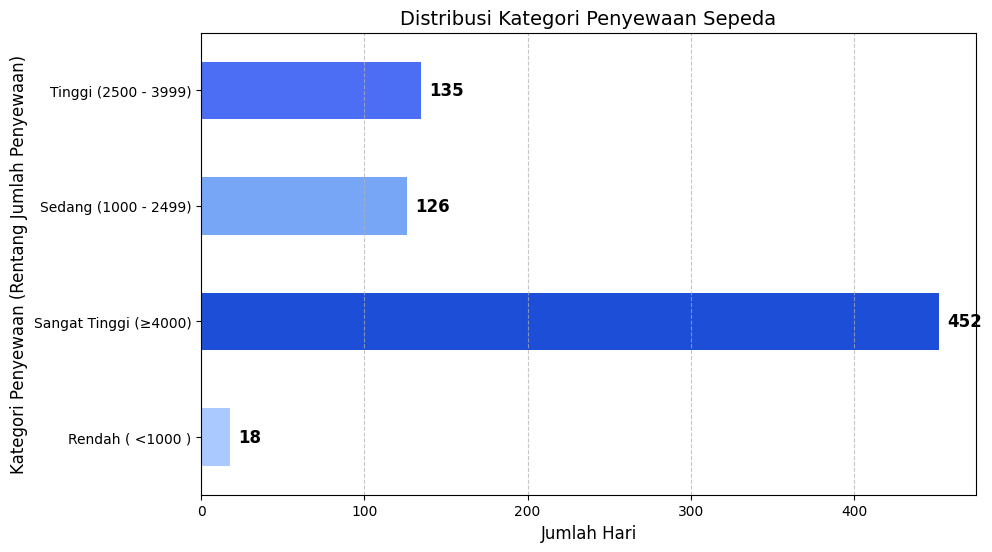

In [208]:
# Clustering dengan Binning Manual
def kategori_penyewaan(cnt):
    if cnt < 1000:
        return "Rendah ( <1000 )"
    elif 1000 <= cnt < 2500:
        return "Sedang (1000 - 2499)"
    elif 2500 <= cnt < 4000:
        return "Tinggi (2500 - 3999)"
    else:
        return "Sangat Tinggi (≥4000)"

clean_day_df["Kategori_Penyewaan"] = clean_day_df["cnt"].apply(kategori_penyewaan)

plt.figure(figsize=(10, 6))
ax = clean_day_df["Kategori_Penyewaan"].value_counts().sort_index().plot(kind="barh", color=["#A9C9FF","#1D4ED8", "#77A6F7", "#4C6EF5"])

for p in ax.patches:
    ax.annotate(str(int(p.get_width())),  # Ubah ke integer agar angka lebih bersih
                (p.get_width() + 5, p.get_y() + p.get_height() / 2),  # Posisi teks
                ha="left", va="center", fontsize=12, fontweight="bold", color="black")

plt.xlabel("Jumlah Hari", fontsize=12)
plt.ylabel("Kategori Penyewaan (Rentang Jumlah Penyewaan)", fontsize=12)
plt.title("Distribusi Kategori Penyewaan Sepeda", fontsize=14)
plt.grid(axis="x", linestyle="--", alpha=0.7)  # Grid di sumbu X karena horizontal

plt.show()


Mayoritas hari memiliki jumlah penyewaan yang sangat tinggi (≥4000), yaitu sebanyak 452 hari. Hal ini menunjukkan bahwa permintaan sepeda secara umum sangat tinggi dan konsisten sepanjang waktu. Kategori penyewaan sedang (1000-2499) tercatat sebanyak 126 hari, sementara kategori tinggi (2500-3999) berjumlah 135 hari, yang menunjukkan adanya fluktuasi permintaan dalam kisaran menengah hingga tinggi. Sementara itu, hanya 18 hari yang memiliki jumlah penyewaan rendah (<1000), menandakan bahwa penggunaan sepeda tetap signifikan hampir setiap hari.
Berdasarkan ini, perlu dipastikan bahwa jumlah sepeda yang tersedia cukup untuk memenuhi permintaan harian yang umumnya tinggi. Strategi promosi atau insentif dapat diterapkan pada hari-hari dengan penyewaan rendah untuk meningkatkan pemakaian. Selain itu, redistribusi sepeda perlu dioptimalkan agar stok tetap tersedia di lokasi dengan lonjakan permintaan, sehingga pengelolaan penyewaan lebih efisien dan tidak mengalami kekurangan atau kelebihan sepeda.

## Conclusion

- Penyewaan lebih tinggi di hari kerja dan musim panas/gugur, sedangkan lebih rendah di akhir pekan dan musim dingin. Strategi: paket langganan hari kerja, diskon akhir pekan, harga premium saat permintaan tinggi, dan promo saat cuaca kurang mendukung.
- Sepeda harus lebih banyak tersedia saat jam sibuk dan didistribusikan ulang dari area sepi ke area ramai. Stok ditingkatkan di musim panas/gugur dan dikurangi di musim dingin untuk efisiensi.
- Suhu berpengaruh positif terhadap penyewaan, sementara kelembaban dan kecepatan angin memiliki dampak negatif tetapi lemah. Faktor lain seperti hari libur dan jam sibuk lebih dominan.
- Penyewaan meningkat pada pertengahan tahun (Mei-September) dan menurun di awal serta akhir tahun. Stok sepeda perlu disesuaikan dengan pola ini agar lebih efisien.
- Pelanggan terdaftar lebih aktif di hari kerja, sedangkan pelanggan kasual lebih banyak menyewa di akhir pekan. Strategi: optimalkan sepeda di area kerja untuk pelanggan terdaftar dan tingkatkan promo serta variasi sepeda di area wisata untuk pelanggan kasual.
- Mayoritas hari memiliki penyewaan sangat tinggi, menunjukkan permintaan yang konsisten. Hari dengan penyewaan rendah jarang terjadi, sehingga stok sepeda harus selalu mencukupi. Strategi promosi dapat diterapkan pada hari dengan penyewaan rendah, sementara redistribusi sepeda perlu dioptimalkan untuk memastikan ketersediaan di lokasi dengan permintaan tinggi.

In [209]:
clean_day_df.to_csv("clean_day.csv", index=False)
clean_hour_df.to_csv("clean_hour.csv", index=False)